#Part a

In [ ]:
#Load exdata1 Data use np.loadtxt

import numpy as np
data = np.loadtxt('ex2data1.txt')



#Visualize the Data

Your plot should look like the figure below, exact markers and colors are not important as long as labels and legend are correct

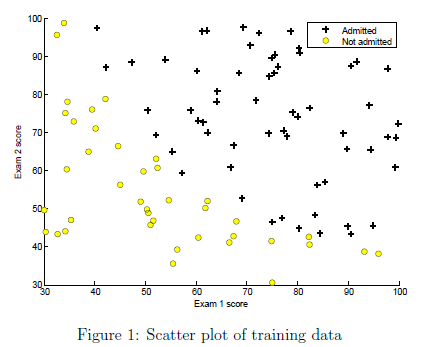

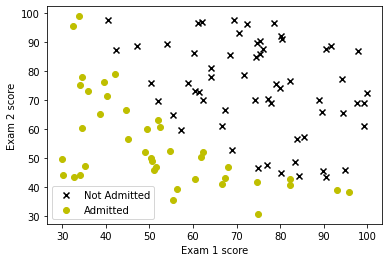

In [ ]:
# Import relevant library to plot the data
from pylab import scatter, show, legend, xlabel, ylabel
X = data[:, :2]
y = data[:, 2]
pos = np.where(y == 1)
neg = np.where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='x', c='black')
scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

#Sigmoid Function

Logistic Regression Hypothesis and Sigmoid function is given below and implementation is given in MATLAB, write the function for sigmoid below

\begin{align}
\ h_{\theta}(x) = g(\theta^Tx),.
\end{align}



\begin{align}
        g(z) = \frac{1}{1+e^{-z}}
\end{align}

In [ ]:
#WRITE FUNCTION HERE

def sigmoid(X):
    '''Compute the sigmoid function '''
    g = 1/(1 + np.exp(-X))
    return g


In [ ]:
#Provide input values to the sigmoid function below and run to check the function
print(sigmoid(0))
print(sigmoid(1))
print(sigmoid(2))
print(sigmoid(5))
print(sigmoid(10))
print(sigmoid(-1))
print(sigmoid(-5))
print(sigmoid(-10))
print(sigmoid(0.5))
print(sigmoid(0.001))

0.5
0.7310585786300049
0.8807970779778823
0.9933071490757153
0.9999546021312976
0.2689414213699951
0.0066928509242848554
4.5397868702434395e-05
0.6224593312018546
0.5002499999791666


#Cost Function and Gradient

The logistic regression cost function and gradient is given below.

\begin{align}
        J(\theta) =\frac{1}{m}\sum_{i=1}^m[-y^{(i)}\log(h_{\theta}(x^{(i)}))- (1 -y^{(i)})\log(1- h_{\theta}(x^{(i)}))
\end{align}

\begin{align}
    \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m( h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}

In [ ]:
#WRITE THE COST AND GRADIENT FUNCTION

def costFunction(theta, X, y): #computes cost given predicted and actual values
    m = len(y)
    h = sigmoid(X @ theta)
    J = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return J

def compute_grad(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1 / m) * (X.T @ (h - y))
    return grad


In [ ]:
X.shape

(100, 2)

In [ ]:
A = np.reshape(initial_theta,(len(initial_theta),1))
A.shape

(3, 1)

Initialize the data

In [ ]:
#Setup the data matrix appropriately
m,n = np.shape(X)

#Add intercept term to X
#HINT FIRST CREATE A Column Matrix of Ones and then use hstack to add it to X
X = np.hstack((np.ones((m, 1)), X))

#Initialize the fitting parameters
initial_theta = np.zeros((3 ,1))


Compute the gradient

In [ ]:
#Verify with MATLAB's test values
cost = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f\n', cost)

Cost at initial theta (zeros): %f
 [0.69314718]


In [ ]:
grad = compute_grad(initial_theta, X, y)
print(grad)

[[  0.5          0.5          0.5         -0.5         -0.5
    0.5         -0.5         -0.5         -0.5         -0.5
    0.5          0.5         -0.5         -0.5          0.5
   -0.5         -0.5          0.5         -0.5         -0.5
    0.5         -0.5          0.5          0.5         -0.5
   -0.5         -0.5          0.5          0.5          0.5
   -0.5         -0.5          0.5         -0.5          0.5
    0.5          0.5         -0.5          0.5          0.5
   -0.5          0.5         -0.5          0.5          0.5
    0.5         -0.5         -0.5         -0.5         -0.5
   -0.5         -0.5         -0.5          0.5          0.5
    0.5         -0.5          0.5         -0.5         -0.5
   -0.5          0.5          0.5          0.5          0.5
    0.5         -0.5          0.5         -0.5         -0.5
    0.5         -0.5         -0.5         -0.5         -0.5
   -0.5         -0.5         -0.5          0.5          0.5
   -0.5         -0.5         -0.5       

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction, x0=initial_theta.flatten(), fprime=compute_grad, args=(X, y.flatten()))
theta = result[0]
costFunction(theta, X, y)


0.20349770159878225

In [ ]:
def predict(theta, X):
    '''Predict whether the label is 0 or 1 using learned logistic regression parameters theta'''
    m = X.shape[0]
    p = np.zeros(m)
    h = sigmoid(X @ theta.T)
    for n in range(m):
      if h[n] > 0.5:
        p[n] = 1
      else:
        p[n] = 0
    return p

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
